The tf.data API introduces a tf.data.Dataset abstraction that represents a sequence of elements, in which each element consists of one or more components. For example, in an image pipeline, an element might be a single training example, with a pair of tensor components representing the image and its label.

There are two distinct ways to create a dataset:

A data source constructs a Dataset from data stored in memory or in one or more files.

A data transformation constructs a dataset from one or more tf.data.Dataset objects.

In [ ]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

Once you have a Dataset object, you can transform it into a new Dataset by chaining method calls on the tf.data.Dataset object. For example, you can apply per-element transformations such as Dataset.map(), and multi-element transformations such as Dataset.batch(). See the documentation for tf.data.Dataset for a complete list of transformations.

The Dataset object is a Python iterable. This makes it possible to consume its elements using a for loop:



In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

In [ ]:
for elem in dataset:
  print(elem.numpy())

In [ ]:
it = iter(dataset)

print(next(it).numpy())

# Dataset structure

A dataset produces a sequence of elements, where each element is the same (nested) structure of components. Individual components of the structure can be of any type representable by tf.TypeSpec, including tf.Tensor, tf.sparse.SparseTensor, tf.RaggedTensor, tf.TensorArray, or tf.data.Dataset.

The Python constructs that can be used to express the (nested) structure of elements include tuple, dict, NamedTuple, and OrderedDict. In particular, list is not a valid construct for expressing the structure of dataset elements. This is because early tf.data users felt strongly about list inputs (e.g. passed to tf.data.Dataset.from_tensors) being automatically packed as tensors and list outputs (e.g. return values of user-defined functions) being coerced into a tuple. As a consequence, if you would like a list input to be treated as a structure, you need to convert it into tuple and if you would like a list output to be a single component, then you need to explicitly pack it using tf.stack.

The Dataset.element_spec property allows you to inspect the type of each element component. The property returns a nested structure of tf.TypeSpec objects, matching the structure of the element, which may be a single component a tuple of components, or a nested tuple of components. For example:




In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))

dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2.element_spec


(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [ ]:
# Dataset containing a sparse tensor.
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))

dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

# Use value_type to see the type of value represented by the element spec

In [ ]:
# Use value_type to see the type of value represented by the element spec
dataset4.element_spec.value_type

In [ ]:
tf.random.uniform([4, 10],  minval=1, maxval=10, dtype=tf.int32)

<tf.Tensor: shape=(4, 10), dtype=int32, numpy=
array([[7, 4, 5, 1, 2, 9, 9, 9, 9, 2],
       [2, 2, 7, 3, 4, 9, 3, 8, 3, 2],
       [2, 8, 7, 6, 1, 9, 2, 3, 3, 6],
       [8, 8, 2, 2, 4, 5, 4, 3, 5, 7]], dtype=int32)>

The Dataset transformations support datasets of any structure. When using the Dataset.map(), and Dataset.filter() transformations, which apply a function to each element, the element structure determines the arguments of the function:



In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))

dataset1

<TensorSliceDataset shapes: (10,), types: tf.int32>

In [ ]:
for z in dataset1:
  print(z.numpy())

[7 6 2 4 3 3 3 9 8 7]
[2 9 9 5 8 9 7 7 4 5]
[8 8 2 9 5 4 6 9 5 3]
[3 9 8 7 4 8 8 7 4 7]


In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.int32, (tf.float32, tf.int32))>

In [ ]:
for a, (b,c) in dataset3:
  print('shapes: {a.shape}, {b.shape}, {c.shape}'.format(a=a, b=b, c=c))

shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)


Dataset oject consist of elements,and we can acess all its elements by for loop,as_numpy_iterator() and iter.

# Reading input data


# Consuming NumPy arrays


If all of your input data fits in memory, the simplest way to create a Dataset from them is to convert them to **tf.Tensor** objects and use Dataset.from_tensor_slices().

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
type(train),type(test),len(train),len(test)

(tuple, tuple, 2, 2)

In [ ]:
train[0].shape  # first element Images

(60000, 28, 28)

In [ ]:
train[1].shape  # second element labels

(60000,)

In [ ]:
images, labels = train
images = images/255
print(type(images))
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
print(dataset)
dataset.element_spec

<class 'numpy.ndarray'>
<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>


(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.uint8, name=None))

# Create the image.ImageDataGenerator

This tutorial uses a dataset of several thousand photos of flowers. The flowers dataset contains 5 sub-directories, one per class:

flowers_photos/
  
  daisy/

  dandelion/

  roses/

  sunflowers/
  
  tulips/

In [ ]:
flowers = tf.keras.utils.get_file( "flower_photos", 
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

def flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

# **Return**
Returns:
    A DirectoryIterator yielding tuples of (x, y)
        where x is a numpy array containing a batch
        of images with shape (batch_size, *target_size, channels)
        and y is a numpy array of corresponding labels.

In [ ]:
generator=img_gen.flow_from_directory( flowers)  #Takes the path to a directory & generates batches of augmented data.

Found 3670 images belonging to 5 classes.


In [ ]:
tuple=next(generator)


In [ ]:
images, labels =tuple

In [ ]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [ ]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers), 
    output_types=(tf.float32, tf.float32), 
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [ ]:
for images, label in ds.take(1):
  print('images.shape: ', images.shape)
  print('labels.shape: ', labels.shape)

Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


# Batching dataset elements

***Simple batching***
The simplest form of batching stacks n consecutive elements of a dataset into a single element. The Dataset.batch() transformation does exactly this, with the same constraints as the tf.stack() operator, applied to each component of the elements: i.e. for each component i, all elements must have a tensor of the exact same shape.

In [ ]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
print(dataset.element_spec)
dataset

(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


<ZipDataset shapes: ((), ()), types: (tf.int64, tf.int64)>

In [ ]:
batched_dataset = dataset.batch(4)
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [ ]:
for batch in batched_dataset:
  print(batch)

(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 0, -1, -2, -3])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([4, 5, 6, 7])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([-4, -5, -6, -7])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 8,  9, 10, 11])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([ -8,  -9, -10, -11])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([12, 13, 14, 15])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([-12, -13, -14, -15])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([16, 17, 18, 19])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([-16, -17, -18, -19])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([20, 21, 22, 23])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([-20, -21, -22, -23])>)
(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([24, 25, 26, 27])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([-24, -25, -26, -27])>)
(<tf.Tensor: sh

In [ ]:
for batch in batched_dataset.take(4):
  print([arr for arr in batch])

[<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 0, -1, -2, -3])>]
[<tf.Tensor: shape=(4,), dtype=int64, numpy=array([4, 5, 6, 7])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([-4, -5, -6, -7])>]
[<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 8,  9, 10, 11])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([ -8,  -9, -10, -11])>]
[<tf.Tensor: shape=(4,), dtype=int64, numpy=array([12, 13, 14, 15])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([-12, -13, -14, -15])>]


In [ ]:
for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


While tf.data tries to propagate shape information, the default settings of Dataset.batch result in an unknown batch size because the last batch may not be full. Note the Nones in the shape:

In [ ]:
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

Use the drop_remainder argument to ignore that last batch, and get full shape propagation:

In [ ]:
batched_dataset = dataset.batch(4, drop_remainder=True)
batched_dataset

<BatchDataset shapes: ((4,), (4,)), types: (tf.int64, tf.int64)>

# Batching tensors with padding
The above recipe works for tensors that all have the same size. However, many models (e.g. sequence models) work with input data that can have varying size (e.g. sequences of different lengths). To handle this case, the **Dataset.padded_batch** transformation enables you to batch tensors of different shape by specifying one or more dimensions in which they may be padded.

In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))

In [ ]:
for i in dataset:  # to convert tensor to numpy use i.numpy()
  print(i)

tf.Tensor([], shape=(0,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([2 2], shape=(2,), dtype=int64)
tf.Tensor([3 3 3], shape=(3,), dtype=int64)
tf.Tensor([4 4 4 4], shape=(4,), dtype=int64)
tf.Tensor([5 5 5 5 5], shape=(5,), dtype=int64)
tf.Tensor([6 6 6 6 6 6], shape=(6,), dtype=int64)
tf.Tensor([7 7 7 7 7 7 7], shape=(7,), dtype=int64)
tf.Tensor([8 8 8 8 8 8 8 8], shape=(8,), dtype=int64)
tf.Tensor([9 9 9 9 9 9 9 9 9], shape=(9,), dtype=int64)


In [ ]:
dataset = dataset.padded_batch(4, padded_shapes=(None,) )

In [ ]:
for batch in dataset.take(2):
  print(batch.numpy())
  print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



The Dataset.padded_batch transformation allows you to set different padding for each dimension of each component, and it may be variable-length (signified by None in the example above) or constant-length. It is also possible to override the padding value, which defaults to 0.

# Training workflows

**Processing multiple epochs**

The tf.data API offers two main ways to process multiple epochs of the same data.

The simplest way to iterate over a dataset in multiple epochs is to use the Dataset.repeat() transformation. First, create a dataset of titanic data:

In [ ]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

32768/30874 [===============================] - 0s 0us/step


In [ ]:
line=0
for i,j in enumerate(titanic_lines):
  line=line+1

print(line)  
  

628


In [ ]:
for line in titanic_lines.take(5):
  print(line.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'


In [ ]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

Applying the Dataset.repeat() transformation with no arguments will repeat the input indefinitely.

The Dataset.repeat transformation concatenates its arguments without signaling the end of one epoch and the beginning of the next epoch. Because of this a Dataset.batch applied after Dataset.repeat will yield batches that straddle epoch boundaries:

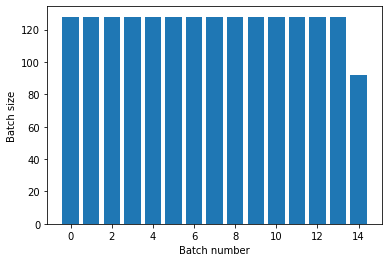

In [ ]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

If you need clear epoch separation, put Dataset.batch before the repeat:

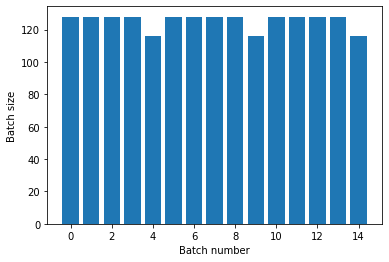

In [ ]:
titanic_batches = titanic_lines.batch(128).repeat(3)

plot_batch_sizes(titanic_batches)

If you would like to perform a custom computation (e.g. to collect statistics) at the end of each epoch then it's simplest to restart the dataset iteration on each epoch:



In [ ]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ", epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


In [ ]:
dataset=tf.data.Dataset.range(1,21).repeat(2).batch(3)
list(dataset.as_numpy_iterator())

[array([1, 2, 3]),
 array([4, 5, 6]),
 array([7, 8, 9]),
 array([10, 11, 12]),
 array([13, 14, 15]),
 array([16, 17, 18]),
 array([19, 20,  1]),
 array([2, 3, 4]),
 array([5, 6, 7]),
 array([ 8,  9, 10]),
 array([11, 12, 13]),
 array([14, 15, 16]),
 array([17, 18, 19]),
 array([20])]

In [ ]:
dataset=tf.data.Dataset.range(1,21).batch(3).repeat(2)
list(dataset.as_numpy_iterator())

[array([1, 2, 3]),
 array([4, 5, 6]),
 array([7, 8, 9]),
 array([10, 11, 12]),
 array([13, 14, 15]),
 array([16, 17, 18]),
 array([19, 20]),
 array([1, 2, 3]),
 array([4, 5, 6]),
 array([7, 8, 9]),
 array([10, 11, 12]),
 array([13, 14, 15]),
 array([16, 17, 18]),
 array([19, 20])]

## Randomly shuffling input data

The Dataset.shuffle() transformation maintains a fixed-size buffer and chooses the next element uniformly at random from that buffer.

Add an index to the dataset so you can see the effect:

In [ ]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

Since the buffer_size is 100, and the batch size is 20, the first batch contains no elements with an index over 120.

In [ ]:
n,line_batch = next(iter(dataset))
print(n.numpy())

[ 32  97  66  22  43  36  45   2  60 107  65   8  18  39  38  20   1  83
   5  52]


In [ ]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10)

Total 628 lines ie 60(10)+2(10)+8(1) batches

In [ ]:
for batch in shuffled.skip(60).take(3):    #last 3 batches
  print(batch[0])
  

tf.Tensor([614 602 525 626 600 520 583 548 546 601], shape=(10,), dtype=int64)
tf.Tensor([559 567 605 313 544 609 599 555 233 603], shape=(10,), dtype=int64)
tf.Tensor([410 480 621 405 562 296 569 580], shape=(8,), dtype=int64)


As with Dataset.batch the order relative to Dataset.repeat matters.

Dataset.shuffle doesn't signal the end of an epoch until the shuffle buffer is empty. So a shuffle placed before a repeat will show every element of one epoch before moving to the next:

In [ ]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)

In [ ]:
print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(60).take(5):
  print(n.numpy())

Here are the item ID's near the epoch boundary:

[543 403 500 622 511 573 515 609 463 468]
[524 617 625 601 559 562 507 425 585 619]
[458 315 599 576 624 600 616 588]
[55 10 42 21 47 70 62 91 49 90]
[88 16 98 66 28  5 26 94 31 79]


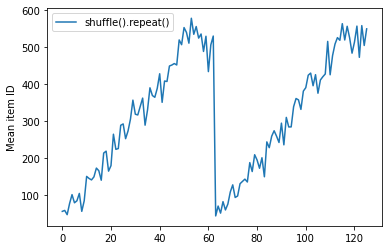

In [ ]:
shuffle_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.ylabel("Mean item ID")
plt.legend()

But a repeat before a shuffle mixes the epoch boundaries together:

In [ ]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)

print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(55).take(15):
  print(n.numpy())

Here are the item ID's near the epoch boundary:

[605 441 582  12 528 615 451 448   3 359]
[540 546 524 503  26  36  30  35  32 562]
[553  25 591 585 616  27 544 233  18  22]
[609 543 577  44  21  53  33  57 552 623]
[579  31 300 573 603 442 545 627 626  38]
[ 56 567 531  46  27  15  47 580  58  69]
[511 415 501  83 443 548 569  45  23 608]
[  5  60 535  82   6  94 596 539   7  42]
[ 37 595 477 302 620  64  81 108  49  59]
[ 98 395 606   8  87 111  84 613  66  51]
[ 34  20  24  72 118 625  99  17 119 112]
[107  39 604  80 507   2  97  22 116  55]
[510  91 622  93  61  85  76 106  75 401]
[ 19 136 373 129 472 128  65 145 132 113]
[ 78  62  10  88 102   4 110 160  11 136]


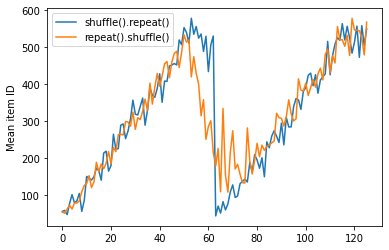

In [ ]:
repeat_shuffle = [n.numpy().mean() for n, line_batch in shuffled]

plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle, label="repeat().shuffle()")
plt.ylabel("Mean item ID")
plt.legend()

In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
dataset = dataset.repeat(2)   # it will shuffle after 1 iteration has happend on entire dataset
print(list(dataset.as_numpy_iterator())[:10])
print(list(dataset.as_numpy_iterator())[10:])

[2, 3, 1, 0, 4, 6, 8, 9, 5, 7]
[1, 3, 0, 4, 6, 5, 8, 9, 2, 7]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.shuffle(3, reshuffle_each_iteration=False)
dataset = dataset.repeat(2)   # it will  not shuffle after 1 iteration has happend on entire dataset
print(list(dataset.as_numpy_iterator())[:10])
print(list(dataset.as_numpy_iterator())[10:])

[2, 1, 3, 4, 6, 5, 8, 9, 0, 7]
[2, 1, 3, 4, 6, 5, 8, 9, 0, 7]


In [ ]:
dataset = tf.data.Dataset.range(10)      # In  this case first 4  batch is made for 10 elements and after it is reinitialize for 10 elements (0 to 9) and again it reshuffle and batch is made.
dataset = dataset.shuffle(3, reshuffle_each_iteration=True).batch(3)
dataset = dataset.repeat(2)   # it will shuffle after 1 iteration has happend on entire dataset
print(list(dataset.as_numpy_iterator())[:10])
#print(list(dataset.as_numpy_iterator())[10:])

[array([2, 1, 4]), array([5, 6, 0]), array([8, 9, 3]), array([7]), array([2, 3, 0]), array([4, 5, 6]), array([1, 8, 9]), array([7])]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.shuffle(3, reshuffle_each_iteration=False).batch(3)
dataset = dataset.repeat(2)   # it will shuffle after 1 iteration has happend on entire dataset
print(list(dataset.as_numpy_iterator())[:10])
#print(list(dataset.as_numpy_iterator())[10:])

[array([1, 3, 4]), array([2, 5, 7]), array([6, 0, 9]), array([8]), array([1, 3, 4]), array([2, 5, 7]), array([6, 0, 9]), array([8])]


In [ ]:
dataset = tf.data.Dataset.range(10).batch(3).repeat(2)  # In  this case first 4  batch is made for 10 elements and after it repeats as it is.
print(list(dataset.as_numpy_iterator())[:10])

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8]), array([9]), array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8]), array([9])]


# Using tf.data with tf.keras

The tf.keras API simplifies many aspects of creating and executing machine learning models. Its .fit() and .evaluate() and .predict() APIs support datasets as inputs. Here is a quick dataset and model setup:

In [206]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [209]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

Passing a dataset of (feature, label) pairs is all that's needed for Model.fit and Model.evaluate:

In [210]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7754 - accuracy: 0.7381
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4686 - accuracy: 0.8410


If you pass an infinite dataset, for example by calling Dataset.repeat(), you just need to also pass the steps_per_epoch argument:

In [211]:
model.fit(fmnist_train_ds.repeat(), epochs=2, steps_per_epoch=20)

Epoch 1/2
20/20 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.8422
Epoch 2/2
20/20 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8516


Steps per epoch

Integer or None. Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. If x is a tf.data dataset, and 'steps_per_epoch' is None, the epoch will run until the input dataset is exhausted. When passing an infinitely repeating dataset, you must specify the steps_per_epoch argument. This argument is not supported with array inputs.

For evaluation you can pass the number of evaluation steps:

In [212]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4454 - accuracy: 0.8454
Loss : 0.4454425573348999
Accuracy : 0.8454499840736389


For long datasets, set the number of steps to evaluate:

In [213]:
loss, accuracy = model.evaluate(fmnist_train_ds.repeat(), steps=10)
print("Loss :", loss)
print("Accuracy :", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.8469
Loss : 0.509552001953125
Accuracy : 0.846875011920929


The labels are not required in when calling Model.predict.

In [214]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps = 10)
print(result.shape)

(320, 10)


But the labels are ignored if you do pass a dataset containing them:

In [215]:
result = model.predict(fmnist_train_ds, steps = 10)
print(result.shape)

(320, 10)
